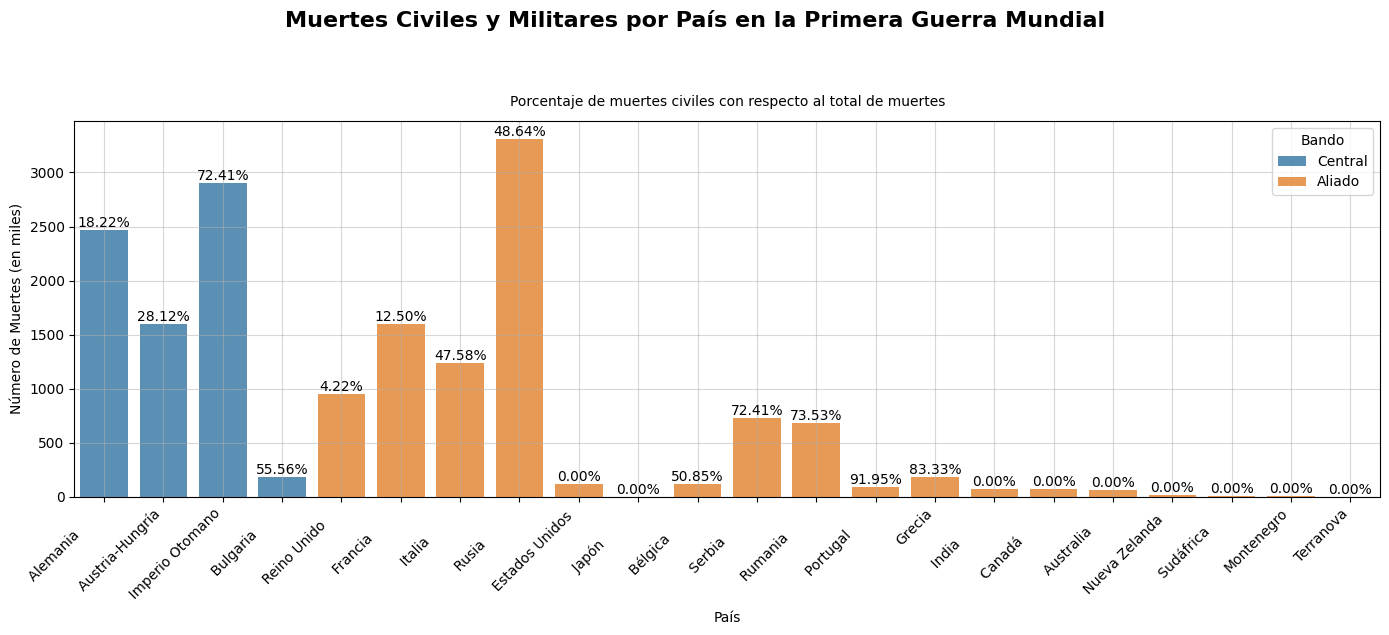

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel("Excel.xlsx")

# Calcular el total de muertes (civiles + militares)
df['Total'] = df[' Muertos Militares (en miles)'] + df['Muertos Civiles (en miles)']

# Calcular el porcentaje de muertes civiles
df['Porcentaje Civiles'] = (df['Muertos Civiles (en miles)'] / df['Total']) * 100

# Crear el gráfico de barras para los bandos
plt.figure(figsize=(14, 6))
barplot = sns.barplot(data=df, x=' País           ', y='Total', hue='Bando', dodge=False, alpha=0.8)

# Añadir etiquetas con el porcentaje de muertes civiles
for index, row in df.iterrows():
    porcentaje = row['Porcentaje Civiles']
    pos_y =  row['Total']
    plt.text(index, pos_y, f'{porcentaje:.2f}%', color='black', ha='center', va='bottom')

# Añadir subtítulo
plt.suptitle('Muertes Civiles y Militares por País en la Primera Guerra Mundial', fontsize=16, fontweight='bold', y=1.05)

# Ajustar diseño
plt.xlabel('País')
plt.ylabel('Número de Muertes (en miles)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.5)
plt.text(0.5, 1.05, 'Porcentaje de muertes civiles con respecto al total de muertes', horizontalalignment='center', verticalalignment='center', transform=barplot.transAxes, fontsize=10)

# Ordenar los datos por muertes totales (civiles + militares)
df.sort_values(by='Total', ascending=False, inplace=True)

# Mostrar gráfico
plt.tight_layout()
plt.show()
